# Homework 1
September 17, 2020

### Assignment:
1. Install a recent version of R
2. Install RStudio
3. Read in the provided datafile ‘anna_data.csv’.
4. Make a new variable that is the natural log of the variable ‘trials’.
5. Graph histograms of both ‘trials’ and the new variable.

6. You and your friend each have a fair coin.You are going to alternate flips (A flips, then B flips, a possible win is decided after each flip).  The first person who gets 10 Heads wins. Do you want to be A (going first) or B? What is the probability that A will win and that B will win? This is hard to do with a formula so it is best to write a simulation. Something we will do often in the course. I will provide some tips on 9/16 in class.

### Answers

For parts 4 and 5 I looked at the data in csv and found that the trials data was very skewed. A log transform reduced the skew. For part 6, I found that it's better to flip the coin first. The probability of winning going first was 0.53 or an odds ratio of just under 1.3.

## Parts 1 - 5

In [1]:
version

               _                           
platform       x86_64-apple-darwin13.4.0   
arch           x86_64                      
os             darwin13.4.0                
system         x86_64, darwin13.4.0        
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [21]:
# load anna_data.csv into dataframe (Part 3)
anna = read.csv("data_files/anna_data.csv")

In [12]:
# take a look
head(anna)

trials,group
164,1
141,1
124,1
721,1
26,1
112,1


In [22]:
# create log(trials) variable and take a look (Part 4)
anna$log_trials = log(anna$trials)
head(anna)

trials,group,log_trials
164,1,5.099866
141,1,4.948760
124,1,4.820282
721,1,6.580639
26,1,3.258097
112,1,4.718499


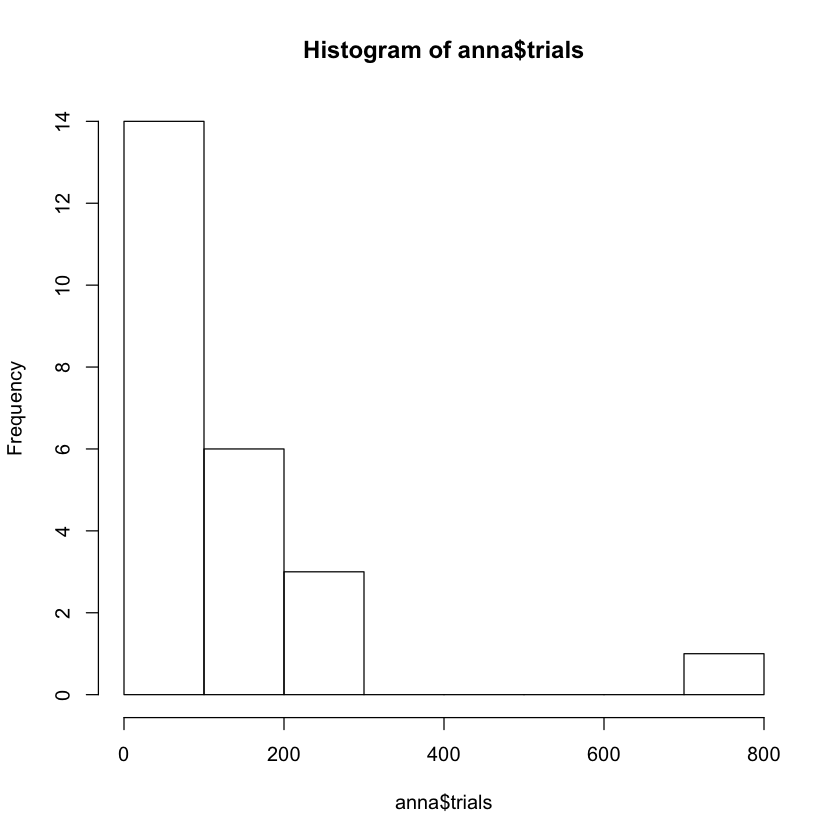

In [26]:
# create histogram of original trials variable (Part 5)
hist(anna$trials)

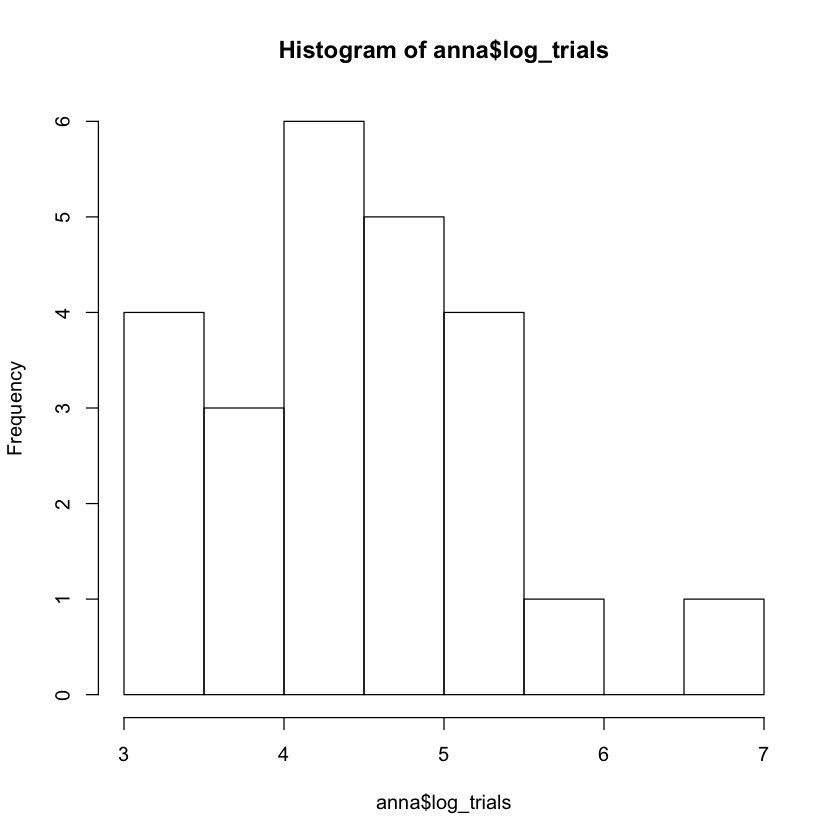

In [24]:
# create histogram of new log_trials variable (Part 5)
hist(anna$log_trials)

## Part 6

You and your friend each have a fair coin.You are going to alternate flips (A flips, then B flips, a possible win is decided after each flip). The first person who gets 10 Heads wins. Do you want to be A (going first) or B? What is the probability that A will win and that B will win? This is hard to do with a formula so it is best to write a simulation. Something we will do often in the course. I will provide some tips on 9/16 in class.

In [38]:
# create coin
coin = c(0, 1)

In [39]:
# sample of size 1 from input vector coin with replacement
num_flips = 1
sample(coin, size=num_flips, replace=TRUE)

[1] 0

In [72]:
# Initialize persons A and B and loop counter
A = 0
B = 0
i = 1

# toss coin until either A == 10 or B ==10
while (A < 10 & B < 10) {
    flip = sample(coin, size=1, replace=TRUE)
    # if heads is flipped
    if(flip == 1) {
        # even turns go to B 
        if((i %% 2) == 0) {
            B = B + 1
        # odd turns go to A
        } else {
            A = A + 1
        }
    }
    i = i+1
}

print(paste("A is: ", A))
print(paste("B is: ", B))

[1] "A is:  10"
[1] "B is:  7"


In [3]:
# create single_game function to play one game of flipping until one person gets heads
single_game = function(){
    # Initialize persons A and B and loop counter
    A = 0
    B = 0
    i = 1
    # create coin
    coin = c(0, 1)
    
    # loop until someone flips 10 heads
    while (A < 10 & B < 10) {
    flip = sample(coin, size=1, replace=TRUE)
    # if heads is flipped
    if(flip == 1) {
        # even turns go to B 
        if((i %% 2) == 0) {
            B = B + 1
        # odd turns go to A
        } else {
            A = A + 1
        }
    }
    i = i+1
    }
    
    if(A == 10) {
        return("A")
    } else {
        return("B")
    }
}


In [4]:
# define simulate_games function to iterate over a game of coin flipping until one person gets 10 heads
# num_games parameter tells us how many games to play
simulate_games = function(num_games){
    
    winner_list = replicate(num_games, single_game()) 
    # return A divided by B, i.e. the probability of going first and winning the game over num_games iterations
    win_tab = table(winner_list)
    A_win = win_tab["A"]
    #print(A_win)
    B_win = win_tab["B"]
    #print(B_win)
    prob_A_Win = (A_win / B_win)
    return(prob_A_Win)
}

In [7]:
# run different numbers of simulations to see how the probability of winning if going first asymptotes
sample_sizes = c(10, 100, 1000, 10000, 20000, 50000, 75000, 100000, 200000)
df = data.frame(matrix(ncol=2, nrow=0))

for (size in 1:length(sample_sizes)){
    A_to_B_ratio = simulate_games(sample_sizes[size])
    new_result = c(sample_sizes[size], as.double(paste(A_to_B_ratio)))
    df = rbind(df, new_result)
    head(df)
    
    print(paste("For ", sample_sizes[size], " games played, Proportion of A Wins: ", A_to_B_ratio))
}

cols = c("num_simulations", "proportion_win_go_first")
names(df) = cols

[1] "For  10  games played, Proportion of A Wins:  1"
[1] "For  100  games played, Proportion of A Wins:  1.12765957446809"
[1] "For  1000  games played, Proportion of A Wins:  1.06185567010309"
[1] "For  10000  games played, Proportion of A Wins:  1.1519259737465"
[1] "For  20000  games played, Proportion of A Wins:  1.14155691187493"
[1] "For  50000  games played, Proportion of A Wins:  1.12938120182275"
[1] "For  75000  games played, Proportion of A Wins:  1.14053313545294"
[1] "For  1e+05  games played, Proportion of A Wins:  1.15275983811246"
[1] "For  2e+05  games played, Proportion of A Wins:  1.13848851631667"


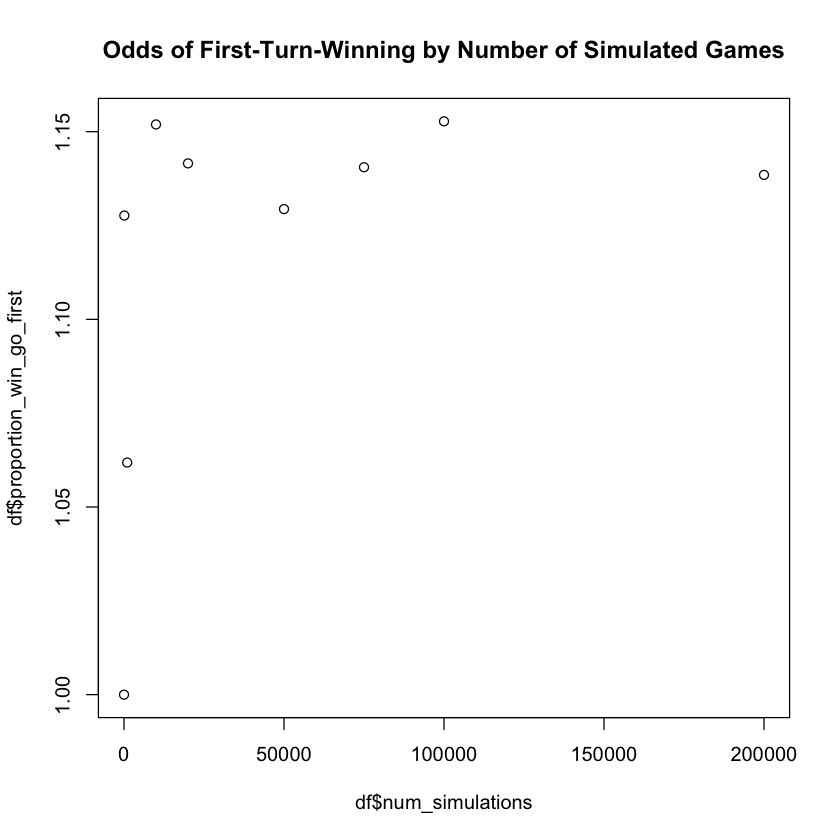

In [8]:
plot(df$num_simulations, df$proportion_win_go_first, main="Odds of First-Turn-Winning by Number of Simulated Games"
    ,xlim=c(0, 200000))


It appears that over many simulations of flipping the coin until one person flips 10 heads, the odds are in favor of the person who flipped first winning. This advantage appears to be about 0.14 or 14%.